#EE769 Assignment 3(Clustering)

##Vyomkesh Chaudhary
##203070028

In [80]:
import numpy as np                                      ##importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Dataset

In [81]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving DataClustering.csv to DataClustering (1).csv
DataClustering.csv has been uploaded, with length 17061


In [82]:
df = pd.read_csv('/content/DataClustering.csv')                       ## Reading csv files into data frames

In [83]:
df

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


# Observation:

There are 4 columns which includes 4 features .

There are 351 samples. 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


#Observations:

 All features are numerical.


In [85]:
for col in df: # for each column
  unique_entries = pd.unique(df[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df[col].isnull().sum()} NaN values")

The column 'x1'  has 351 unique entries, and 0 NaN values
The column 'x2'  has 351 unique entries, and 0 NaN values
The column 'x3'  has 351 unique entries, and 0 NaN values
The column 'x4'  has 351 unique entries, and 0 NaN values


#Observations:
 
There are no Null entries.

# Part A :Visualize and pre-processing

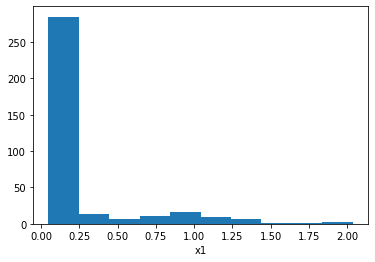

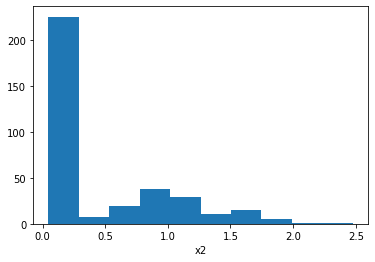

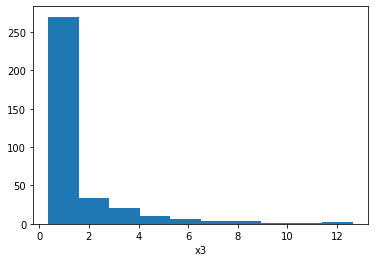

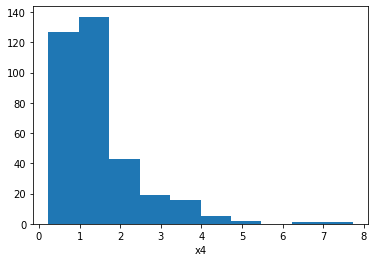

In [86]:
for col in df.columns.values: #for all columns
  #if the values are integer or discrete
  if(df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

#Observations:

Data is well spreaded

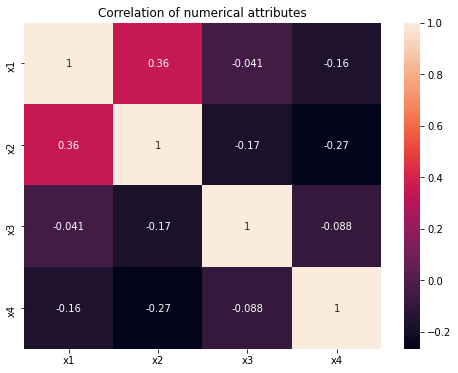

In [87]:
correlation = df.corr(method='spearman')

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation,annot=True)

#Observations:

Correlation between variables is not very high.

#Power Transformation

Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

In [88]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = power.fit_transform(df)


In [89]:
df_transformed1 = pd.DataFrame(df_transformed)

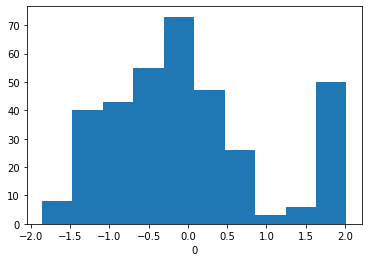

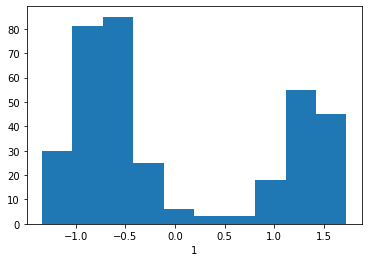

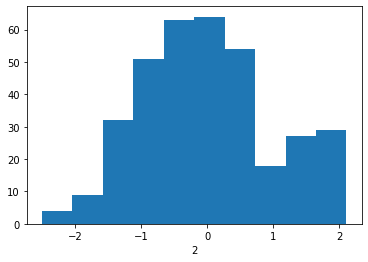

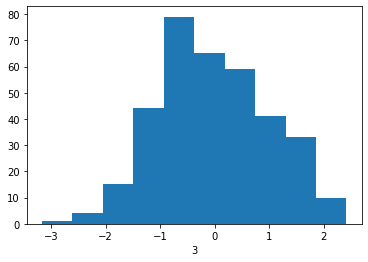

In [90]:
for col in df_transformed1.columns.values: #for all columns
  #if the values are integer or discrete
  if(df_transformed1[col].dtypes == 'int64') | (df_transformed1[col].dtypes == 'float64'):
    plt.hist(df_transformed1[col],10 if len(pd.unique(df_transformed1[col]))>20 else len(pd.unique(df_transformed1[col])))
    plt.xlabel(col)
    plt.show()

#Observations:


Skewness got decreased of data

#Part B : Train k-means

In [99]:
df_transformed1

,0,1,2,3
0,1.892893,1.524854,-0.340075,-0.414077
1,1.987377,1.562231,-0.473995,-1.039780
2,1.941537,1.362540,0.139150,0.218409
3,1.950474,1.401740,0.104241,-0.434169
4,1.956236,1.452761,-0.571026,0.664683
...,...,...,...,...
346,0.343397,-0.348687,1.367269,0.770490
347,0.543987,-0.715826,-1.031990,1.423283
348,-0.947166,-0.875133,-0.374598,1.705557
349,-0.700038,-0.719286,-0.063888,1.149479


Text(0, 0.5, 'Inertia')

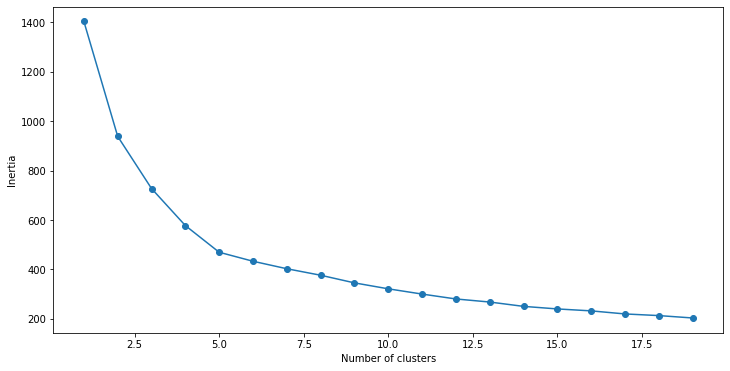

In [106]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_transformed1)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#Observations:

choosing number of clusters = 5 

In [113]:

# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(df_transformed1)
pred = kmeans.predict(df_transformed1)

In [114]:
frame = pd.DataFrame(df_transformed1)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    90
2    75
1    66
0    64
3    56
Name: cluster, dtype: int64

# Part C: DBSCAN

In [115]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_transformed1)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [122]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_transformed1)
distances, indices = nbrs.kneighbors(df_transformed1)

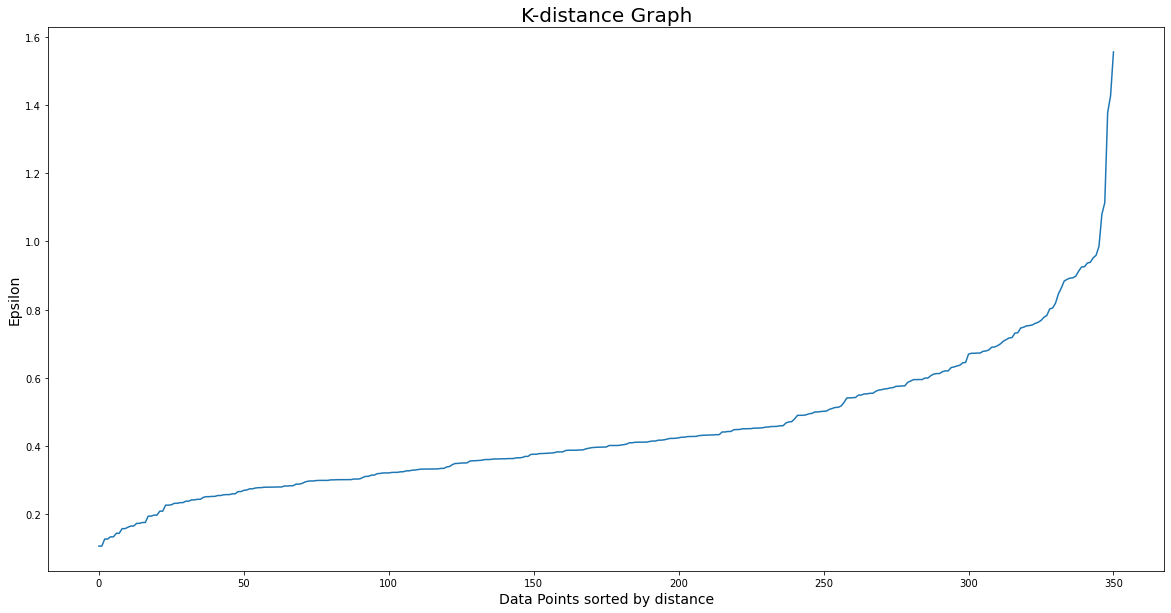

In [123]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#Observations:
The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 1 in this case.

In [144]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=1,min_samples=5)
dbscan_opt.fit(df_transformed1)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [145]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 3    89
 2    75
 4    64
 1    64
 0    53
-1     6
Name: DBSCAN_opt_labels, dtype: int64

#Observations:

same number of clusters  as in k means.

#Part d : t-sne embedding

In [159]:
from sklearn.manifold import TSNE

# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(2,random_state=1, n_iter=15000, metric="cosine")

embs = tsne.fit_transform(df_transformed1)
# Add to dataframe for convenience
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]

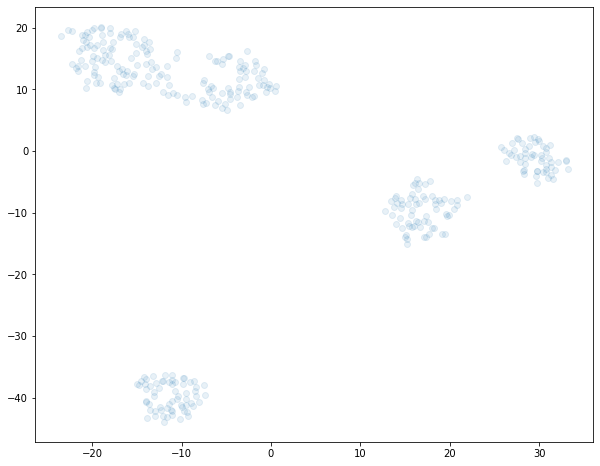

In [162]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(df.x, df.y, alpha=.1);

#Observations:

As we can see there are 5 clusters.

#Credits:

1.EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB

2.https://www.kaggle.com/c/tabular-playground-series-jan-2021/discussion/214378

3.https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

4.https://towardsdatascience.com/visualizing-feature-vectors-embeddings-using-pca-and-t-sne-ef157cea3a42